In [28]:
from sklearn.datasets import load_files
import numpy as np

train_dir = '../input/fruits/Fruits_1/Training'
test_dir = '../input/fruits/Fruits_1/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  21168
Testing set size :  7115


In [29]:
no_of_classes = len(np.unique(y_train))
no_of_classes

41

In [30]:
print(y_train[0:10])

[14 17 37 31 11 22 38  3  5 18]


In [31]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
x_test,x_valid = x_test[3500:],x_test[:3500]
y_test,y_vaild = y_test[3500:],y_test[:3500]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (3500,)
Vaildation y : (3500, 41)
Test X :  (3615,)
Test y :  (3615, 41)


In [33]:
x_train[0]

'../input/fruits/Fruits_1/Training/Banana Lady Finger/r_4_100.jpg'

In [34]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (21168, 100, 100, 3)
Validation set shape :  (3500, 100, 100, 3)
Test set shape :  (3615, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [35]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import numpy as np

tf.compat.v1.set_random_seed(
    0
)
np.random.seed(0)

model=Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 256,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(41,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_3 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)       

In [36]:
def recall(y_true, y_pred):
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     possible_positives= K.sum(K.round(K.clip(y_true, 0, 1)))
     recall = true_positives / (possible_positives + K.epsilon())
     return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',recall,precision])
print('Compiled!')

Compiled!


In [37]:
from keras.models import Sequential
import tensorflow as tf
import numpy as np
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
batch_size = 60

tf.compat.v1.set_random_seed(0)
np.random.seed(0)
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 60,
        epochs=50,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
                    verbose=2,shuffle=True
        )

Train on 21168 samples, validate on 3500 samples
Epoch 1/50
 - 5s - loss: 1.7931 - accuracy: 0.5834 - recall: 0.4817 - precision: 0.7356 - val_loss: 0.3103 - val_accuracy: 0.9263 - val_recall: 0.9048 - val_precision: 0.9454

Epoch 00001: val_loss improved from inf to 0.31026, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/50
 - 5s - loss: 0.1893 - accuracy: 0.9348 - recall: 0.9218 - precision: 0.9503 - val_loss: 0.0926 - val_accuracy: 0.9683 - val_recall: 0.9686 - val_precision: 0.9698

Epoch 00002: val_loss improved from 0.31026 to 0.09258, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/50
 - 5s - loss: 0.1034 - accuracy: 0.9628 - recall: 0.9570 - precision: 0.9698 - val_loss: 0.1659 - val_accuracy: 0.9580 - val_recall: 0.9568 - val_precision: 0.9584

Epoch 00003: val_loss did not improve from 0.09258
Epoch 4/50
 - 5s - loss: 0.0768 - accuracy: 0.9741 - recall: 0.9705 - precision: 0.9785 - val_loss: 0.1381 - val_accuracy: 0.9580 - val_recall: 0.9573 - val_precision: 0.9587


Epoch 00035: val_loss did not improve from 0.02337
Epoch 36/50
 - 5s - loss: 0.0336 - accuracy: 0.9943 - recall: 0.9941 - precision: 0.9945 - val_loss: 0.1872 - val_accuracy: 0.9691 - val_recall: 0.9692 - val_precision: 0.9703

Epoch 00036: val_loss did not improve from 0.02337
Epoch 37/50
 - 5s - loss: 0.0083 - accuracy: 0.9979 - recall: 0.9977 - precision: 0.9981 - val_loss: 0.1019 - val_accuracy: 0.9869 - val_recall: 0.9870 - val_precision: 0.9873

Epoch 00037: val_loss did not improve from 0.02337
Epoch 38/50
 - 5s - loss: 0.0033 - accuracy: 0.9991 - recall: 0.9992 - precision: 0.9992 - val_loss: 0.1927 - val_accuracy: 0.9694 - val_recall: 0.9698 - val_precision: 0.9698

Epoch 00038: val_loss did not improve from 0.02337
Epoch 39/50
 - 5s - loss: 0.0212 - accuracy: 0.9952 - recall: 0.9949 - precision: 0.9954 - val_loss: 0.1759 - val_accuracy: 0.9743 - val_recall: 0.9743 - val_precision: 0.9748

Epoch 00039: val_loss did not improve from 0.02337
Epoch 40/50
 - 5s - loss: 0.0222 - a

In [38]:
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9950207471847534


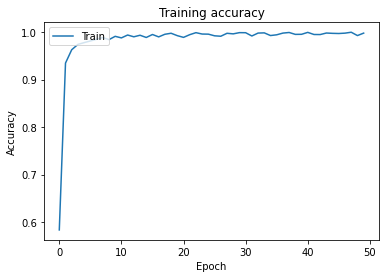

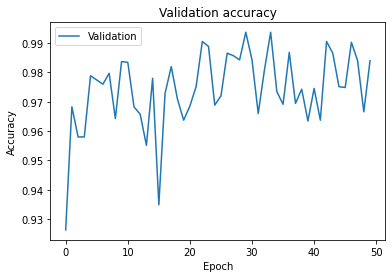

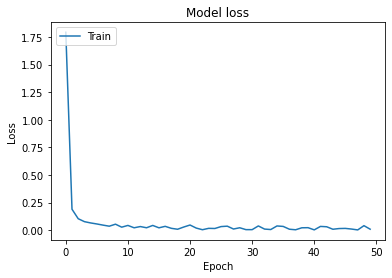

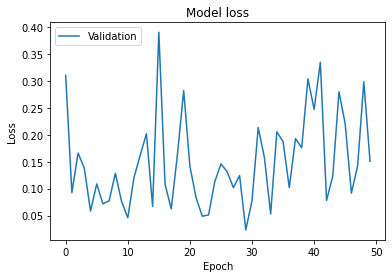

In [40]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [41]:
preds=np.round(model.predict(x_test),0)
print("Rounded test_labels",preds)

Rounded test_labels [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
classification=metrics.classification_report(y_test,preds)
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        89
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        78
           4       0.99      1.00      0.99        88
           5       1.00      0.99      0.99        84
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        81
           8       0.95      1.00      0.97        76
           9       1.00      1.00      1.00        64
          10       1.00      1.00      1.00        91
          11       1.00      0.94      0.97        81
          12       1.00      1.00      1.00       106
          13       1.00      1.00      1.00        88
          14       1.00      1.00      1.00        86
          15       1.00      1.00      1.00        82
          16       0.99      1.00      0.99        81
          17       1.00    

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
